In [1]:
!pip install ultralytics --no-deps --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1706kXS5zd9ApFxEBXnK")
project = rf.workspace("qweroiuyt").project("rcnn-microplastic-itjer")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-big


Extracting Dataset Version Zip to RCNN-microplastic-1 in yolov11:: 100%|██████████| 29513/29513 [00:03<00:00, 9833.77it/s] 


Total images: 1483


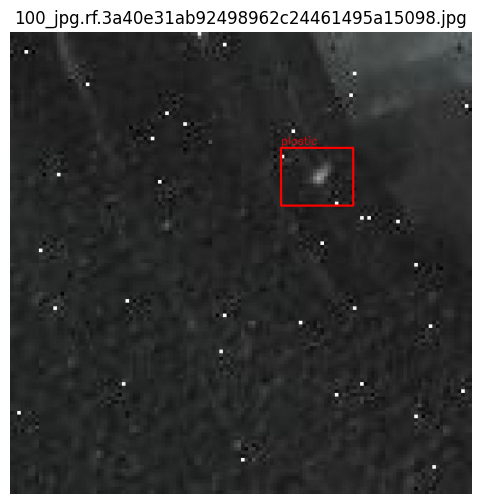

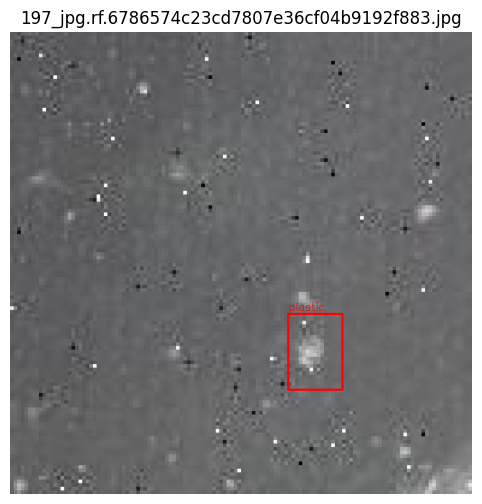

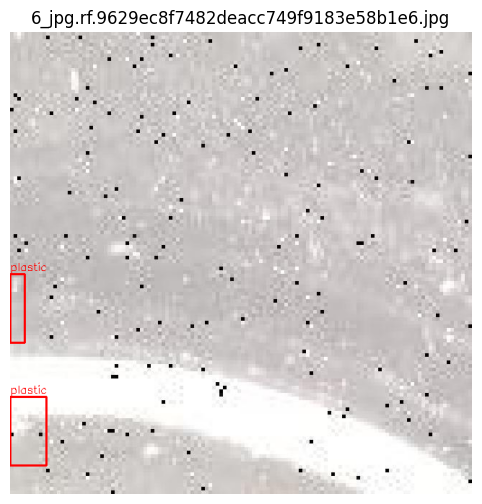

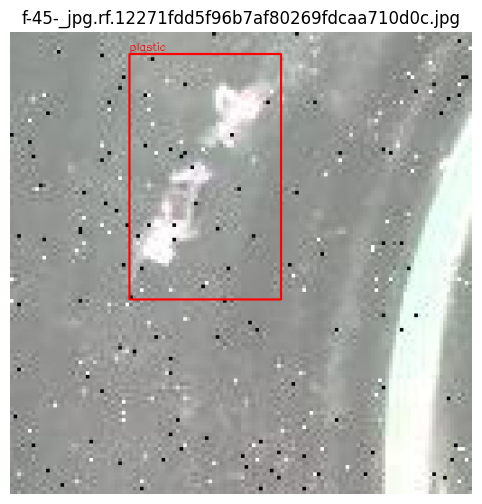

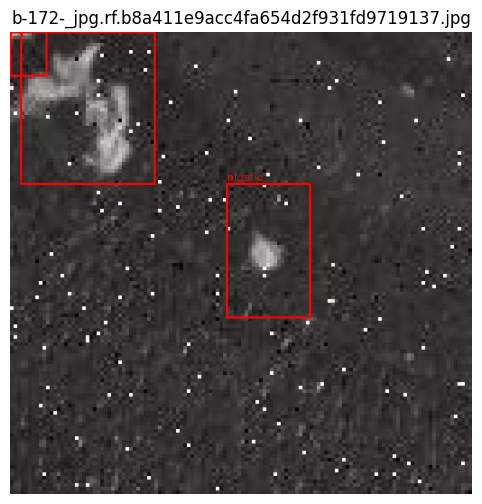

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# --- Configuration ---
images_dir = '/kaggle/working/RCNN-microplastic-1/test/images'   # path to images
labels_dir = '/kaggle/working/RCNN-microplastic-1/test/labels'   # YOLO .txt files

class_names = ["plastic"]   # <-- put your classes here

print("Total images:", len(os.listdir(images_dir)))

# Get all image filenames
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Display the first 5 images with bounding boxes
for filename in image_files[:5]:
    img_path = os.path.join(images_dir, filename)
    label_path = os.path.join(labels_dir, filename.replace('.jpg', '.txt')
                                               .replace('.png', '.txt')
                                               .replace('.jpeg', '.txt'))

    # Load the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w = image.shape[:2]

    # Check if annotation file exists
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            annotations = f.readlines()
    else:
        annotations = []

    # Draw bounding boxes
    for ann in annotations:
        cls, xc, yc, bw, bh = map(float, ann.strip().split())
        cls = int(cls)

        # Convert normalized YOLO coords → pixel coords
        xc *= w
        yc *= h
        bw *= w
        bh *= h

        x1 = int(xc - bw / 2)
        y1 = int(yc - bh / 2)
        x2 = int(xc + bw / 2)
        y2 = int(yc + bh / 2)

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

        # Draw label
        cv2.putText(image, class_names[cls], (x1, max(y1 - 5, 0)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Show the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(filename)
    plt.show()

In [4]:
from ultralytics import YOLO

# 3. Download YOLOv11s weights (small version)
!wget -O yolov11s.pt https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt

# 4. Load the model
model = YOLO("yolov11s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--2025-11-30 19:43:59--  https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11s.pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/1c11d5fd-cb03-4cf0-9eb2-0b0f5601ef45?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-30T20%3A18%3A56Z&rscd=attachment%3B+filename%3Dyolo11s.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-30T19%3A18%3A41Z&ske=2025-11-30T20%3A18%3A56Z&sks=b&s

In [5]:
import torch
ckpt = torch.load("yolov11s.pt", weights_only=False)

In [6]:
# You already loaded YOLOv11 model as: model = YOLO("yolov11s.pt")

history = []

def callback2(trainer):
    """
    trainer -> Ultralytics trainer object
    trainer.metrics -> contains metrics for last epoch
    """
    metrics = trainer.metrics
    history.append(metrics)
    print("Callback collected:", metrics)

# ---- Register callback in Ultralytics style ----
model.add_callback("on_fit_epoch_end", callback2)

# ---- Train ----
model.train(
    data="/kaggle/working/RCNN-microplastic-1/data.yaml",
    epochs=60,
    batch=4,
    lr0=1e-4,
    workers=2
)

print("History saved:", history)

Ultralytics 8.3.233 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/RCNN-microplastic-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0,

KeyboardInterrupt: 

In [7]:
import os

# Path to your yolov11s weights inside Kaggle
weights_path = "/kaggle/working/yolov11s.pt"  # update if your dataset path is different

# Check if the file exists
if os.path.exists(weights_path):
    print("File found:", weights_path)
else:
    print("File not found:", weights_path)


File found: /kaggle/working/yolov11s.pt


In [8]:
import os

for root, dirs, files in os.walk("/kaggle/working", topdown=True):
    for name in dirs:
        print(os.path.join(root, name))

/kaggle/working/RCNN-microplastic-1
/kaggle/working/.virtual_documents
/kaggle/working/runs
/kaggle/working/RCNN-microplastic-1/train
/kaggle/working/RCNN-microplastic-1/valid
/kaggle/working/RCNN-microplastic-1/test
/kaggle/working/RCNN-microplastic-1/train/labels
/kaggle/working/RCNN-microplastic-1/train/images
/kaggle/working/RCNN-microplastic-1/valid/labels
/kaggle/working/RCNN-microplastic-1/valid/images
/kaggle/working/RCNN-microplastic-1/test/labels
/kaggle/working/RCNN-microplastic-1/test/images
/kaggle/working/runs/detect
/kaggle/working/runs/detect/train
/kaggle/working/runs/detect/train/weights


In [9]:
custom_model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [10]:
res = custom_model("/kaggle/working/RCNN-microplastic-1/test/images")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1483 /kaggle/working/RCNN-microplastic-1/test/images/100_jpg.rf.3a40e31ab92498962c24461495a15098.jpg: 640x640 (no detections), 15.9ms
image 2/1483 /kaggle/working/RCNN-microplastic-1/test/images/100_jpg.rf.90bf29837108da0f8002083ea986bb63.jpg: 640x640 (no detections), 15.7ms
image 3/1483 /kaggle/working/RCNN-microplastic-1/test/images/100_jpg.rf.a29535288dd0a0a172d1ac0cd8d777c1.jpg: 640x640 (no detections), 15.8ms
image 4/1483 /kaggle/working/R

In [12]:
import pandas as pd

results_path = "/kaggle/working/runs/detect/train/results.csv"

results = pd.read_csv(results_path)

print("Detection Metrics (YOLOv11):")
print(results.tail(1))   # last row = final metrics

Detection Metrics (YOLOv11):
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
18     19  5052.48         1.74511         1.89158          1.8317   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
18               0.73049            0.58735           0.65686   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss   lr/pg0  \
18               0.3003       1.81968        1.5554       1.91764  0.00703   

     lr/pg1   lr/pg2  
18  0.00703  0.00703  
